# <span style="color:#F72585"><center>Análisis de componentes principales y regresión logística</center></span>



<figure>
<center>
<img src="../Imagenes/Galaxy_artist.png" width="600" height="400" align="center" /> 
</center>   
</figure>

Fuente: <a href="https://commons.wikimedia.org/wiki/File:Galaxy,_artist_view_-_Galaxie,_vue_d%27artiste.png">SarahAnthonyART</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons


## <span style="color:#4361EE">Referencias</span>

1 .https://towardsdatascience.com/ACP-using-python-scikit-learn-e653f8989e60

## <span style="color:#4361EE">Introducción a ACP</span>

Una forma más común de acelerar un algoritmo de aprendizaje automático es mediante el análisis de componentes principales (ACP). Si un algoritmo de aprendizaje es demasiado lento porque la dimensión de entrada es demasiado alta, usar ACP para acelerarlo puede ser una opción razonable. Esta es probablemente la aplicación más común de ACP en aprendizaje automático. Otra aplicación común de ACP es para la visualización de datos.

Para comprender el valor de usar ACP para la visualización de datos, la primera parte de esta publicación del tutorial repasa una visualización básica del conjunto de datos de IRIS después de aplicar ACP. La segunda parte utiliza ACP para acelerar un algoritmo de aprendizaje automático (regresión logística) en el conjunto de datos MNIST.

## <span style="color:#4361EE">Matemáticas del ACP</span>

El análisis de componentes principales (ACP) es un procedimiento estadístico que utiliza una transformación ortogonal para convertir un conjunto de observaciones de variables posiblemente correlacionadas (entidades cada una de las cuales toma varios valores numéricos) en un conjunto de valores de variables linealmente no correlacionadas llamadas componentes principales.

Esta transformación se define de tal manera que el primer componente principal tiene la mayor varianza posible (es decir, representa la mayor cantidad posible de variabilidad en los datos), y cada componente subsiguiente, a su vez, tiene la mayor varianza posible bajo la restricción que es ortogonal a las componentes anteriores.

Los vectores resultantes (cada uno de los cuales es una combinación lineal de las variables y contiene n observaciones) son un conjunto de bases ortogonales no correlacionadas. ACP es sensible a la escala relativa de las variables originales.

ACP se define matemáticamente como una transformación lineal ortogonal que transforma los datos en un nuevo sistema de coordenadas, de modo que la mayor variación por alguna proyección de los datos llega a estar en la primera coordenada (llamada el primer componente principal), la segunda mayor variación en el segunda coordenada, y así sucesivamente.

Considere una matriz de datos, $X_{np}$, con una media empírica cero por columnas (la media muestral de cada columna se ha desplazado a cero), donde cada una de las $n$ filas representa una repetición diferente del experimento, y cada una de las columnas $p$ brinda un tipo particular de característica (por ejemplo, los resultados de un sensor en particular).

Matemáticamente, la transformación está definida por un conjunto de vectores $p$-dimensionales de pesos o coeficientes ${w}_{(k)}=(w_{1},\dots ,w_{p})_{(k) }$ que asignan cada vector de fila ${x}_{(i)}$ de $X$ a un nuevo vector de puntajes de componentes principales ${t}_{(i)}=(t_{1},\dots , t_{l})_{(i)}$, dado por

$$
t_{{k}{(i)}}={x}_{(i)}\cdot {w}_{(k)}\qquad \mathrm{for} \qquad i=1,\dots,n\qquad k=1,\dots,l,
$$

de tal manera que las variables individuales $t_{1},\dots,t_{l}$ de $t$ consideradas sobre el conjunto de datos heredan sucesivamente la máxima varianza posible de $X$, con cada vector de coeficientes $w$ restringido ser un vector unitario (donde $l$ generalmente se selecciona para que sea menor que $p$ para reducir la dimensionalidad).

### <span style="color:#4CC9F0">Primer Componente </span>

Se puede demostrar que el primer componente $t_1(i) = x_{(i)} \cdot w_{(1)} $ se obtiene si $w_{(1)}$ es el primer vector propio normalizado de $X^TX $, es decir, el vector propio normalizado asociado al primer valor propio (el mayor) de $X^TX$.

### <span style="color:#4CC9F0">Los componentes restantes</span>

En general la $k$-ésima componente es $t_1(i) = x_{(i)} \cdot w_{(k)} $ se obtiene si $w_{(k)}$ es la $k$-ésima normalizada vector propio de $X^TX$.
 

### <span style="color:#4CC9F0">Transformación blanqueadora o esférica</span>

Por lo tanto, la descomposición completa de los componentes principales de $X$ se puede dar como

$$
T = X W,
$$

donde $W$ es la matriz cuya columna $k$-ésima es $w_{(k)}$.

### <span style="color:#4CC9F0">Reducción de dimensiones: Códec</span>

$$
T_L = X W_L,
$$

$T_L$ y $W_L$ se obtienen de $T$ y $W$ respectivamente, conservando las primeras $L$ columnas.

### <span style="color:#4CC9F0">Calidad de la reducción</span>

Se puede demostrar que $Var(t_k) = \lambda_k$ , donde $\lambda_k$ es el $k$-ésimo valor propio de $X^TX$. Entonces el índice para evaluar la calidad de la reducción de la dimensión está dado por

$$
i = \frac{\sum_{k\le L} \lambda_k}{\sum_{k\le p} \lambda_k}\le 1.
$$

### <span style="color:#4CC9F0">Transformación de reconstrucción: decodec</span>

Como usualmente $W$ es una matriz ortogonal, obtenemos que

$$
X = T W^T.
$$

### <span style="color:#4CC9F0">Descomposición de valores singulares</span>

La transformación de componentes principales también se puede asociar con otra factorización de matrices, la descomposición en valores singulares (SVD) de $X$,


$$
{X} ={U} {\Sigma} {W} ^{T}
$$

Aquí $\Sigma$ es una matriz diagonal rectangular $n\times p$ de números positivos $\sigma(k)$, llamados los valores singulares de $X$; $U$ es una matriz $n\times n$, cuyas columnas son vectores unitarios ortogonales de longitud $n$ llamados vectores singulares izquierdos de $X$; y $W$ es un $p\times p$ cuyas columnas son vectores unitarios ortogonales de longitud p y llamados vectores singulares derechos de $X$.

Usando la descomposición de valores singulares, la matriz de puntuación T se puede escribir

$$
T = X W.
$$


$\leadsto$ Existen algoritmos eficientes para calcular el SVD de $X$ sin tener que formar la matriz $X^TX$, por lo que calcular el SVD es ahora la forma estándar de calcular un análisis de componentes principales a partir de una matriz de datos.

## <span style="color:#4361EE">ACP para visualización de datos</span>

Para muchas aplicaciones de aprendizaje automático, es útil poder visualizar sus datos. Visualizar datos en 2 o 3 dimensiones no es tan desafiante. Sin embargo, incluso el conjunto de datos de Iris utilizado en esta parte del tutorial es de 4 dimensiones. Puede usar PCA para reducir esos datos de 4 dimensiones en 2 o 3 dimensiones para que pueda trazar y, con suerte, comprender mejor los datos.

### <span style="color:#4CC9F0">Cargar conjunto de datos de iris</span>

El conjunto de datos de Iris es uno de los conjuntos de datos que viene con scikit-learn y que no requiere la descarga de ningún archivo de algún sitio web externo. El siguiente código cargará el conjunto de datos del iris.

In [14]:
import pandas as pd
path = '../Datos/iris.csv'
# carga los datos en un dataframe Pandas 
df = pd.read_csv(path)
df.head()


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### <span style="color:#4CC9F0">Estandarizar los datos</span>

ACP se efectúa por lo general escalando los datos, por lo que es necesario escalar las características en los datos antes de aplicar el método. Usaremos `StandardScaler` para ayudarlo a estandarizar las características del conjunto de datos en escala (media = 0 y varianza = 1), que es un requisito para el rendimiento óptimo de muchos algoritmos de aprendizaje automático.

In [16]:
from sklearn.preprocessing import StandardScaler

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# Separa las variables (características)
x = df.loc[:, features].values
# Separa el objetivo (atrget)
y = df.loc[:,['target']].values
# Estandariza las caractersiticas
x = StandardScaler().fit_transform(x)
# visualiza los datos
pd.DataFrame(x)

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


### <span style="color:#4CC9F0">Proyección en 2D</span>

Los datos originales tienen 4 columnas (longitud del sépalo, anchura del sépalo, longitud del pétalo y anchura del pétalo). En esta sección, el código proyecta los datos originales que son de 4 dimensiones en 2 dimensiones. Debo señalar que después de la reducción de la dimensionalidad, generalmente no se asigna un significado particular a cada componente principal. Los nuevos componentes son solo las dos dimensiones principales de la variación.

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['C1', 'C2'])
principalDf

,C1,C2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


### <span style="color:#4CC9F0">Concatena los componentes principales con la variable objetivo</span>

Esta sección solo está trazando datos bidimensionales. Observe en el siguiente gráfico que las clases parecen estar bien separadas entre sí.

In [18]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf

,C1,C2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


### <span style="color:#4CC9F0">Visualizar proyección 2D</span>


Esta sección solo está trazando datos bidimensionales. Observe en el siguiente gráfico que las clases parecen estar bien separadas entre sí.Una sentencia de selección se escribe formalmente como


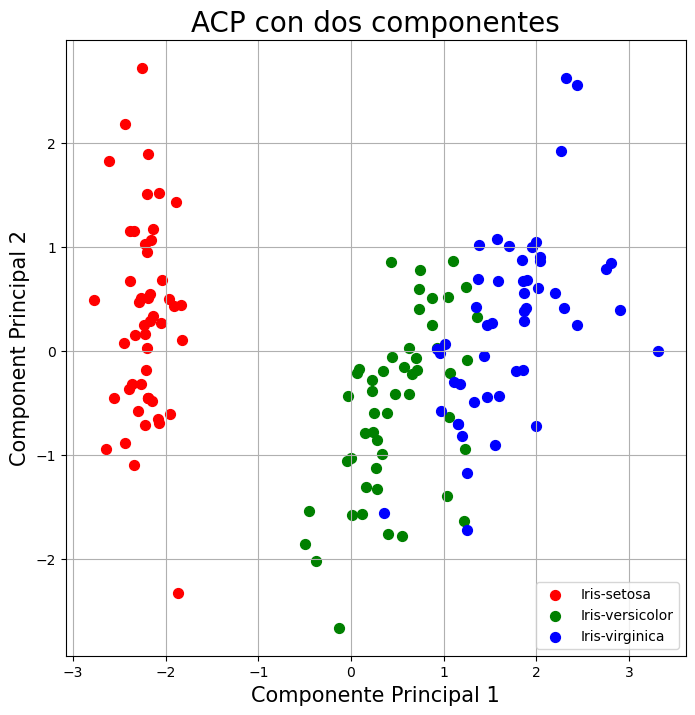

In [19]:

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente Principal 1', fontsize = 15)
ax.set_ylabel('Component Principal 2', fontsize = 15)
ax.set_title('ACP con dos componentes', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'C1']
               , finalDf.loc[indicesToKeep, 'C2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### <span style="color:#4CC9F0">Varianza explicada</span>

La varianza explicada le indica cuánta información (varianza) se puede atribuir a cada uno de los componentes principales. Esto es importante ya que, si bien puede convertir un espacio de 4 dimensiones en un espacio de 2 dimensiones, pierde parte de la varianza (información) cuando hace esto. Mediante el uso del atributo added_variance_ratio_, puede ver que el primer componente principal contiene el 72,77 % de la varianza y el segundo componente principal contiene el 23,03 % de la varianza. Juntos, los dos componentes contienen el 95,80% de la información.

In [20]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

P## <span style="color:#4361EE">ACP para acelerar los algoritmos de aprendizaje automático</span>

Una de las aplicaciones más importantes de PCA es acelerar los algoritmos de aprendizaje automático. El uso del conjunto de datos IRIS no sería práctico aquí, ya que el conjunto de datos solo tiene 150 filas y solo 4 columnas de características. La base de datos MNIST de dígitos escritos a mano es más adecuada ya que tiene 784 columnas de funciones (784 dimensiones), un conjunto de entrenamiento de 60 000 ejemplos y un conjunto de prueba de 10 000 ejemplos.

### <span style="color:#4CC9F0">Introducción a MNINST</span>

La base de datos de dígitos escritos a mano del MNIST, disponible en esta página, tiene un conjunto de entrenamiento de 60 000 ejemplos y un conjunto de prueba de 10 000 ejemplos. Es un subconjunto de un conjunto más grande disponible en NIST. Los dígitos se normalizaron en tamaño y se centraron en una imagen de tamaño fijo.
Es una buena base de datos para las personas que desean probar técnicas de aprendizaje y métodos de reconocimiento de patrones en datos del mundo real mientras dedican un esfuerzo mínimo al preprocesamiento y formateo.

La base de datos MNIST de dígitos escritos a mano está disponible en el siguiente sitio web: http://yann.lecun.com/exdb/mnist/

En esta lección usamos los datos disponibles en [Kaggle](https://www.kaggle.com/competitions/digit-recognizer/data), los cuales hemos bajado localmente.

In [33]:
train = pd.read_csv('../Datos/digit-recognizer/train.csv')
train_label = train.label
train.drop('label', axis = 1, inplace = True)
train = train.to_numpy()

test = pd.read_csv('../Datos/digit-recognizer/test.csv')
test = test.to_numpy()


In [34]:
train.shape

(42000, 784)

In [35]:
test.shape

(28000, 784)

|Parámetros | Número|
|--- | ---|
|Clases | 10|
|muestras por clase | 7000 muestras por clase|
|Muestra total | 70000|
|Muestras de entrenamiento | 42000|
|Muestras de prueba| 28000|
|Dimensionalidad | 784 $(28 \times 28)$|
|Características | valoers enteros entre 0 y 255|
 



In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Ajusta la escala solamente con los datos de entrenamiento
scaler.fit(train)

StandardScaler()

In [37]:
# Applica la trasnformación tanto a los datos de entrenamiento como de validación
train_img = scaler.transform(train)
test_img = scaler.transform(test)

### <span style="color:#4CC9F0">Importar y aplicar ACP</span>

Observe que el código a continuación tiene .95 para el parámetro de número de componentes. Significa que scikit-learn elige la cantidad mínima de componentes principales de modo que se retenga el 95 % de la varianza.

In [38]:
# Make an instance of the Model
from sklearn.decomposition import PCA
pca = PCA(n_components=.95)

Nota: Puede averiguar cuántos componentes elige PCA después de ajustar el modelo usando pca.n_components_ . En este caso, el 95% de la varianza asciende a 320 componentes principales.

In [39]:
pca.fit(train_img)
pca.n_components_

320

Aplique la asignación (transformación) tanto al conjunto de entrenamiento como al conjunto de prueba.

In [40]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

El código anterior reducirá el tamaño de la base de datos mnist y la reconstruirá en su dimensión original. Ahora podemos trazar los datos en tamaño pequeño.

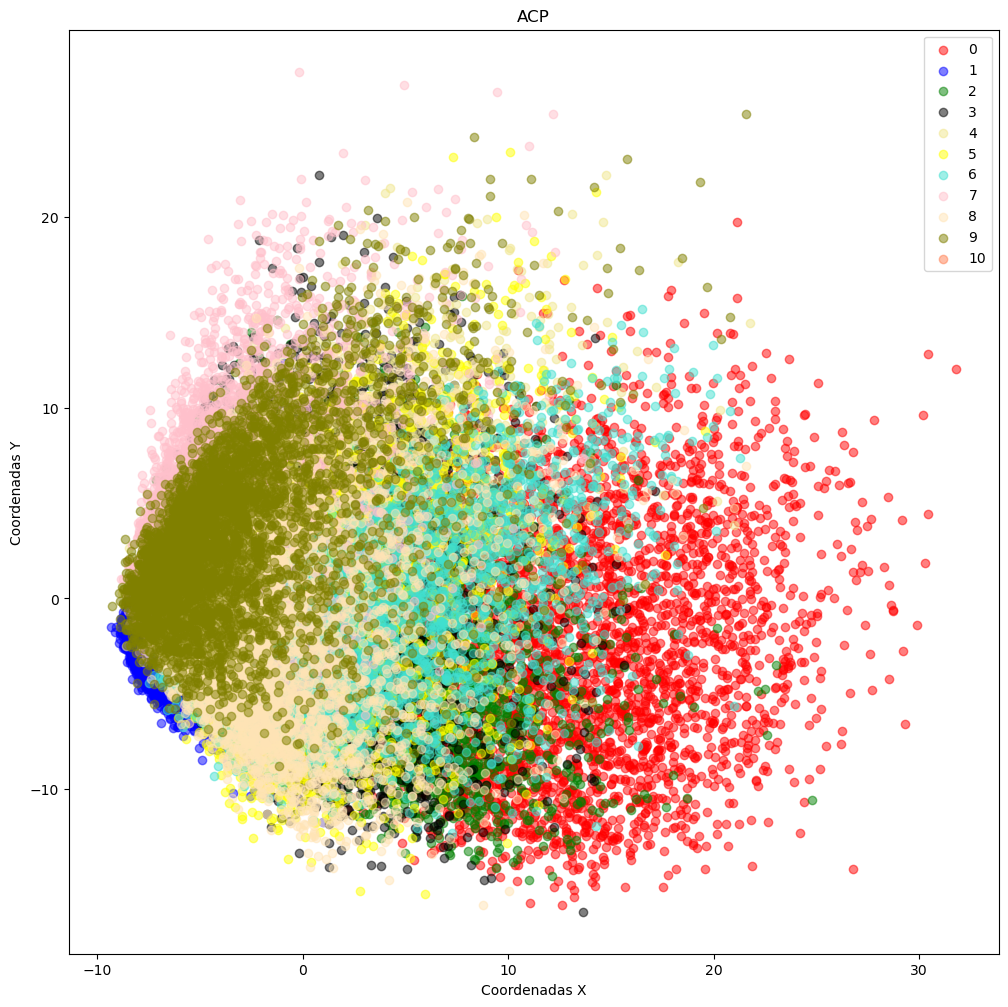

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))

plt.scatter(train_img[train_label==0, 0], train_img[train_label==0, 1], color='red', alpha=0.5,label='0')
plt.scatter(train_img[train_label==1, 0], train_img[train_label==1, 1], color='blue', alpha=0.5,label='1')
plt.scatter(train_img[train_label==2, 0], train_img[train_label==2, 1], color='green', alpha=0.5,label='2')
plt.scatter(train_img[train_label==3, 0], train_img[train_label==3, 1], color='black', alpha=0.5,label='3')
plt.scatter(train_img[train_label==4, 0], train_img[train_label==4, 1], color='khaki', alpha=0.5,label='4')
plt.scatter(train_img[train_label==5, 0], train_img[train_label==5, 1], color='yellow', alpha=0.5,label='5')
plt.scatter(train_img[train_label==6, 0], train_img[train_label==6, 1], color='turquoise', alpha=0.5,label='6')
plt.scatter(train_img[train_label==7, 0], train_img[train_label==7, 1], color='pink', alpha=0.5,label='7')
plt.scatter(train_img[train_label==8, 0], train_img[train_label==8, 1], color='moccasin', alpha=0.5,label='8')
plt.scatter(train_img[train_label==9, 0], train_img[train_label==9, 1], color='olive', alpha=0.5,label='9')
plt.scatter(train_img[train_label==10, 0], train_img[train_label==10, 1], color='coral', alpha=0.5,label='10')
plt.title("ACP"),
plt.ylabel('Coordenadas Y')
plt.xlabel('Coordenadas X')
plt.legend()
plt.show()

### <span style="color:#4CC9F0">Aplicar regresión logística a los datos transformados</span>

Importa el modelo que quieres usar. En sklearn, todos los modelos de aprendizaje automático se implementan como clases de Python

In [45]:
from sklearn.linear_model import LogisticRegression

#### Instancia un objeto de tipo `LogisticRegression`

In [51]:
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=1000) # lbfgs es el optimizador a usar

#### Entrena el modelo en los datos

Almacenando la información aprendida de los datos.

El modelo está aprendiendo la relación entre los dígitos y las etiquetas.

In [52]:
logisticRegr.fit(train_img, train_label)

LogisticRegression(max_iter=1000)

In [53]:
# Predicción para múltiples observaciones (imágenes) a la veze
pred = logisticRegr.predict(test_img[0:20])
pred

array([2, 0, 9, 7, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 0, 3, 1, 9, 0])

In [55]:
# calcula la precisión del modelo con los datos de entrenamiento
score = logisticRegr.score(train_img, train_label)
print(score)

0.9394761904761905


[0 1 2 3 4 5 6 7 8 9]


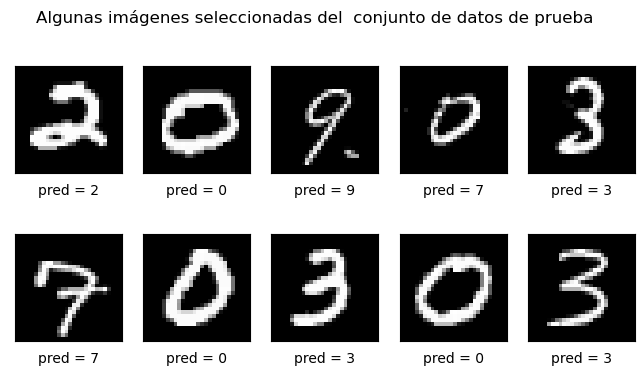

In [62]:
# select the images
import numpy as np

Nr =2
Nc = 5
id = np.arange(0,10,1)
print (### <span style="color:#4CC9F0">Aplicar regresión logística a los datos transformados</span>id)


# Create subplots and hide ticks
import matplotlib.pyplot as plt

fig, axs = plt.subplots(Nr, Nc,sharex=True, sharey=True, figsize=(8,4))
for ax in axs.flat:
        ax.set(xticks=[], yticks=[])

fig.suptitle('Algunas imágenes seleccionadas del  conjunto de datos de prueba')
k=0
images = []
for i in range(Nr):
    for j in range(Nc):
        # Generate data with a range that varies from one plot to the next.
        data = test[id[k]]
        # lbl = str(y_test[id[k]])
        predi = str(pred[k])
        images.append(axs[i, j].imshow(data.reshape((28, 28)), cmap='gray'))
        axs[i, j].label_outer()
        k= k+1
        axs[i,j].set_xlabel('pred = ' +  predi)
        
plt.show()

### <span style="color:#4CC9F0">Nota</span>

Los datos de prueba en mnist no están etiquetados, por lo que no podemos ver dirctamente si el modelo ha generalizado bien.  Eso se debe en este caso que es una competencia y estos datos de prueba son para someter a la prueba.

### <span style="color:#4CC9F0">Ejercicio</span>

Divida los datos de ewntrenamiento en dos subconjuntos: entranamiento y validación. Entrene el modelo y verifique si ha genrazadi bien. Investigue metricas específicas para evaluar el modelo. 

## <span style="color:#4361EE">Decodificando los datos</span>

En esta parte no usamos la escalación para revisar la reducción de dimensión.

In [67]:
# instancia PCA
pca = PCA(.95)

# Reduce the dimension de los datos
lower_dimensional_data = pca.fit_transform(train)

In [68]:
pca.n_components_

154

La idea de pasar de 784 componentes a 154 (códec) es reducir el tiempo de ejecución de un algoritmo de aprendizaje supervisado (en este caso, regresión logística). Una de las cosas interesantes de PCA es que podemos pasar de una representación comprimida (154 componentes) a una aproximación de los datos originales de alta dimensión (784 componentes): decodec.

In [74]:
approximation = pca.inverse_transform(lower_dimensional_data)

In [75]:
approximation.shape

(42000, 784)

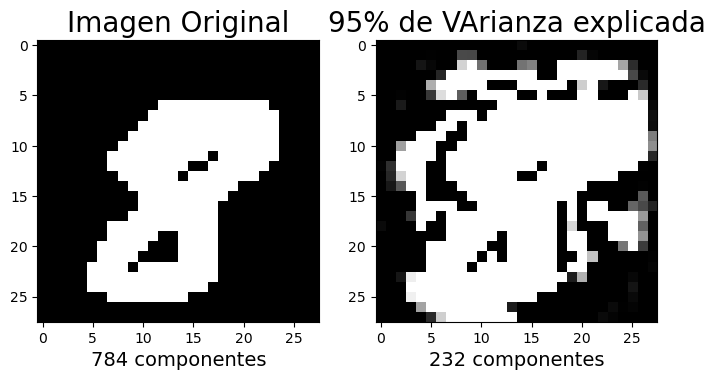

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(train[10].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 1));
plt.xlabel('784 componentes', fontsize = 14)
plt.title('Imagen Original', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[10].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 1));
plt.xlabel('232 componentes', fontsize = 14)
plt.title('95% de VArianza explicada', fontsize = 20);

### <span style="color:#4CC9F0">Varianza explicada vs número de componentes</span>

In [82]:
# Si n_components no está configurado, todos los componentes se mantienen (784 en este caso)
pca = PCA()

In [86]:
pca.fit(train)

PCA()

In [87]:
pca.n_components_

784

In [88]:
# Suma de  varianza explicada
tot = sum(pca.explained_variance_)
tot

3434021.2457725178

In [89]:
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5])

[9.748937689497424, 7.1602662750271175, 6.145903355957285, 5.379301996327657, 4.894262134042037]


In [90]:
# Cumulative explained variance
cum_var_exp = np.cumsum(var_exp)

Plot can help you understand the level of redundancy present in multiple dimensions.

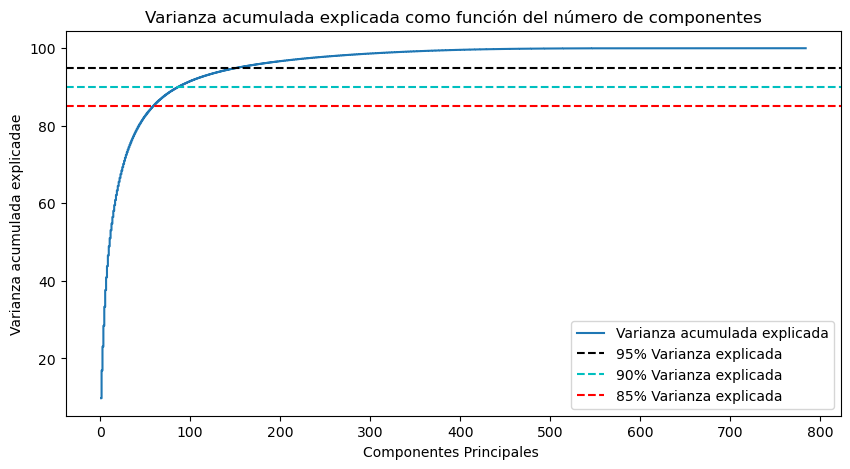

In [92]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.step(range(1, 785), cum_var_exp, where='mid',label='Varianza acumulada explicada')
plt.title('Varianza acumulada explicada como función del número de componentes')
plt.ylabel('Varianza acumulada explicadae')
plt.xlabel('Componentes Principales ')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Varianza explicada')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Varianza explicada')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Varianza explicada')
plt.legend(loc='best')
plt.show()

Número de componentes principales para el 99 %, 95 %, 90 % y 85 % de la varianza explicada

In [ ]:
# Los índices correspondientes a la primera aparición se devuelven con la función np.argmax
# Agregar 1 al final del valor en la lista ya que los componentes principales comienzan desde 1 y los índices comienzan desde 0 (np.argmax)
componentsVariance = [784, np.argmax(cum_var_exp > 99) + 1, np.argmax(cum_var_exp > 95) + 1, np.argmax(cum_var_exp > 90) + 1, np.argmax(cum_var_exp >= 85) + 1]

In [94]:
componentsVariance 

[784, 331, 154, 87, 59]

In [95]:
from sklearn.decomposition import PCA

# Esta es una función extremadamente ineficiente.
def explainedVariance(percentage, images): 
    # percentage should be a decimal from 0 to 1 
    pca = PCA(percentage)
    pca.fit(images)
    components = pca.transform(images)
    approxOriginal = pca.inverse_transform(components)
    return approxOriginal

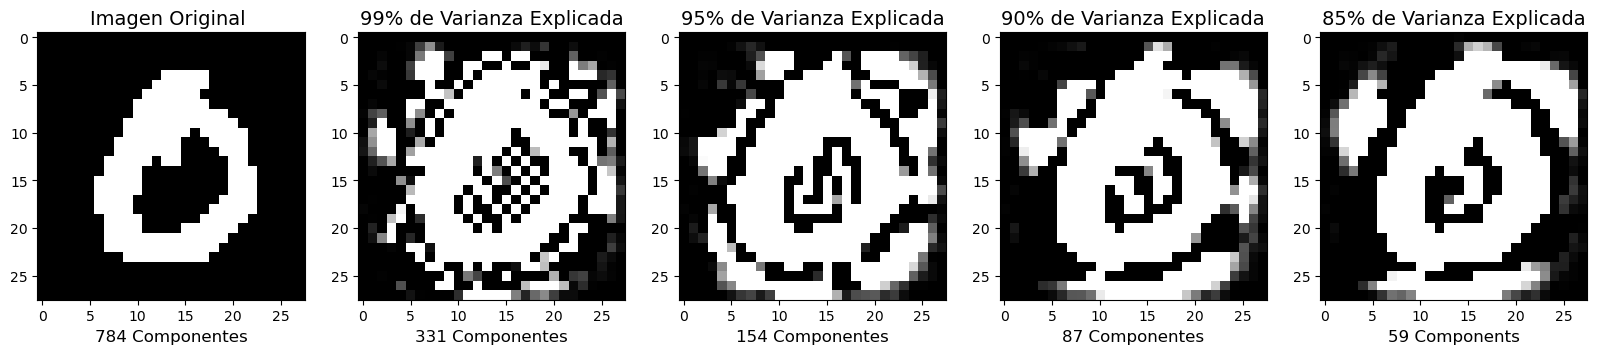

In [100]:
plt.figure(figsize=(20,4));

selected = 200
# Original Image (784 components)
plt.subplot(1, 5, 1);
plt.imshow(train[selected].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 1));
plt.xlabel('784 Componentes', fontsize = 12)
plt.title('Imagen Original ', fontsize = 14);

# 331 principal components
plt.subplot(1, 5, 2);
plt.imshow(explainedVariance(.99,train)[selected].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 1));
plt.xlabel('331 Componentes', fontsize = 12)
plt.title('99% de Varianza Explicada', fontsize = 14);

# 154 principal components
plt.subplot(1, 5, 3);
plt.imshow(explainedVariance(.95,train)[selected].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 1));
plt.xlabel('154 Componentes', fontsize = 12)
plt.title('95% de Varianza Explicada', fontsize = 14);

# 87 principal components
plt.subplot(1, 5, 4);
plt.imshow(explainedVariance(.90, train)[selected].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 1));
plt.xlabel('87 Componentes', fontsize = 12)
plt.title('90% de Varianza Explicada', fontsize = 14);

# 59 principal components
plt.subplot(1, 5, 5);
plt.imshow(explainedVariance(.85, train)[selected].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 1));
plt.xlabel('59 Components', fontsize = 12)
plt.title('85% de Varianza Explicada', fontsize = 14);
